In [97]:
import os
from PIL import Image

import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchvision import datasets
import torchvision
from torchvision.datasets import ImageFolder

from tqdm import tqdm_notebook as tq
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split

In [98]:
dataset_path = 'archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

transforms.Compose([
    #transforms.Resize((128, 128)),
    transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = ImageFolder(root=dataset_path, transform=transforms.ToTensor())

In [99]:
dir(dataset)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_format_transform_repr',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'extensions',
 'extra_repr',
 'find_classes',
 'imgs',
 'loader',
 'make_dataset',
 'root',
 'samples',
 'target_transform',
 'targets',
 'transform',
 'transforms']

In [100]:
dataset.samples

[('archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG',
  0),
 ('archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG',
  0),
 ('archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_270deg.JPG',
  0),
 ('archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_90deg.JPG',
  0),
 ('archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_new30degFlipLR.JPG',
  0),
 ('archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmen

In [101]:
dataset.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [102]:
new_samples_1 = []
new_classes = []
for path,label in dataset.samples:
    if 'apple' in path.lower() or 'potato' in path.lower():
        new_samples_1.append((path,label))
        if dataset.classes[label] not in new_classes:
            new_classes.append(dataset.classes[label])

In [103]:
new_class_to_idx = {cls:idx for idx,cls in enumerate(new_classes)}
new_class_to_idx

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Potato___Early_blight': 4,
 'Potato___Late_blight': 5,
 'Potato___healthy': 6}

In [104]:
new_samples_1 = [(path, new_class_to_idx[dataset.classes[label]]) for path, label in new_samples_1]  

In [105]:
from collections import Counter
labels = [label for path, label in new_samples_1]
Counter(labels)

Counter({0: 2016, 3: 2008, 1: 1987, 4: 1939, 5: 1939, 6: 1824, 2: 1760})

In [106]:
class customDataset(Dataset):
    def __init__(self, samples,class_to_idx, transform=None):
        self.samples = samples
        self.class_to_idx = class_to_idx
        self.targets = [label for _, label in samples]
        self.classes = list(class_to_idx.keys())
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        sample = Image.open(path).convert('RGB')
        if self.transform:
            sample = self.transform(sample)
        return sample, label

In [107]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5 ), (0.5, 0.5, 0.5))
])
new_dataset = customDataset(new_samples_1, new_class_to_idx, transform=transform)
new_dataset

In [108]:
dir(new_dataset)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'class_to_idx',
 'classes',
 'samples',
 'targets',
 'transform']

In [109]:
new_dataset.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy']

In [110]:
sample, label = new_dataset[0]

In [111]:
sample

tensor([[[ 0.3176,  0.3098,  0.3020,  ...,  0.4745,  0.4667,  0.4353],
         [ 0.3255,  0.3176,  0.3020,  ...,  0.4745,  0.4745,  0.4588],
         [ 0.3333,  0.3333,  0.3333,  ...,  0.4667,  0.4588,  0.4588],
         ...,
         [-0.1765, -0.1922, -0.2078,  ..., -0.0275, -0.0196, -0.0196],
         [-0.2000, -0.1843, -0.2000,  ..., -0.0118, -0.0039, -0.0039],
         [-0.2000, -0.1922, -0.2000,  ..., -0.0588, -0.0431, -0.0353]],

        [[ 0.2863,  0.2784,  0.2706,  ...,  0.4510,  0.4431,  0.4118],
         [ 0.2941,  0.2863,  0.2706,  ...,  0.4510,  0.4510,  0.4353],
         [ 0.3020,  0.3020,  0.3020,  ...,  0.4431,  0.4353,  0.4353],
         ...,
         [-0.2549, -0.2706, -0.2863,  ..., -0.1529, -0.1451, -0.1451],
         [-0.2784, -0.2627, -0.2784,  ..., -0.1373, -0.1294, -0.1294],
         [-0.2784, -0.2706, -0.2784,  ..., -0.1843, -0.1686, -0.1608]],

        [[ 0.5451,  0.5373,  0.5294,  ...,  0.6784,  0.6706,  0.6392],
         [ 0.5529,  0.5451,  0.5294,  ...,  0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9372549..0.7176471].


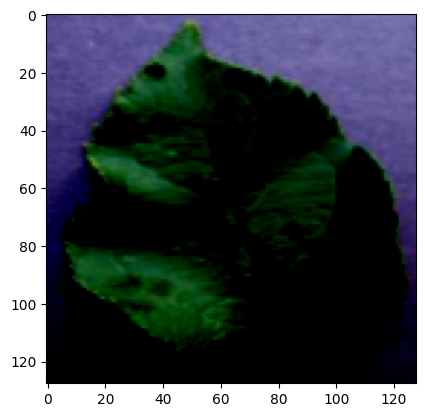

In [112]:
import matplotlib.pyplot as plt

plt.imshow(np.transpose(sample.numpy(), (1, 2, 0)))